In [37]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

# Libraries for Sentiment Analysis
import re
import nltk
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS


# to avoid warnings
import warnings
warnings.filterwarnings('ignore')



In [2]:
# reading datasets
trump = pd.read_csv("dataset/hashtag_donaldtrump.csv", lineterminator='\n')
print(trump.head(3))

            created_at      tweet_id  \
0  2020-10-15 00:00:01  1.316529e+18   
1  2020-10-15 00:00:01  1.316529e+18   
2  2020-10-15 00:00:02  1.316529e+18   

                                               tweet  likes  retweet_count  \
0  #Elecciones2020 | En #Florida: #JoeBiden dice ...    0.0            0.0   
1  Usa 2020, Trump contro Facebook e Twitter: cop...   26.0            9.0   
2  #Trump: As a student I used to hear for years,...    2.0            1.0   

             source      user_id           user_name user_screen_name  \
0         TweetDeck  360666534.0  El Sol Latino News  elsollatinonews   
1  Social Mediaset   331617619.0             Tgcom24  MediasetTgcom24   
2   Twitter Web App    8436472.0              snarke           snarke   

                                    user_description  ...  \
0  🌐 Noticias de interés para latinos de la costa...  ...   
1  Profilo ufficiale di Tgcom24: tutte le notizie...  ...   
2  Will mock for food! Freelance writer, blogger,.

In [3]:
# Display all the columns in the DataFrame
print(trump.columns)

Index(['created_at', 'tweet_id', 'tweet', 'likes', 'retweet_count', 'source',
       'user_id', 'user_name', 'user_screen_name', 'user_description',
       'user_join_date', 'user_followers_count', 'user_location', 'lat',
       'long', 'city', 'country', 'continent', 'state', 'state_code',
       'collected_at'],
      dtype='object')


In [4]:
# reading datasets
biden = pd.read_csv("dataset/hashtag_joebiden.csv", lineterminator='\n')
print(biden.head(2))

            created_at      tweet_id  \
0  2020-10-15 00:00:01  1.316529e+18   
1  2020-10-15 00:00:18  1.316529e+18   

                                               tweet  likes  retweet_count  \
0  #Elecciones2020 | En #Florida: #JoeBiden dice ...    0.0            0.0   
1  #HunterBiden #HunterBidenEmails #JoeBiden #Joe...    0.0            0.0   

             source      user_id           user_name user_screen_name  \
0         TweetDeck  360666534.0  El Sol Latino News  elsollatinonews   
1  Twitter for iPad  809904438.0         Cheri A. 🇺🇸     Biloximeemaw   

                                    user_description  ...  \
0  🌐 Noticias de interés para latinos de la costa...  ...   
1  Locked and loaded Meemaw. Love God, my family ...  ...   

  user_followers_count                 user_location       lat      long  \
0               1860.0  Philadelphia, PA / Miami, FL  25.77427 -80.19366   
1               6628.0                           NaN       NaN       NaN   

   city    

In [5]:
#Data Assessment
print(trump.shape)
print(biden.shape)

(970919, 21)
(776886, 21)


In [6]:
# Getting trump dataset information
trump.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 970919 entries, 0 to 970918
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   created_at            970919 non-null  object 
 1   tweet_id              970919 non-null  float64
 2   tweet                 970919 non-null  object 
 3   likes                 970919 non-null  float64
 4   retweet_count         970919 non-null  float64
 5   source                970043 non-null  object 
 6   user_id               970919 non-null  float64
 7   user_name             970897 non-null  object 
 8   user_screen_name      970919 non-null  object 
 9   user_description      869651 non-null  object 
 10  user_join_date        970919 non-null  object 
 11  user_followers_count  970919 non-null  float64
 12  user_location         675957 non-null  object 
 13  lat                   445719 non-null  float64
 14  long                  445719 non-null  float64
 15  

In [7]:
# Getting biden dataset information
biden.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776886 entries, 0 to 776885
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   created_at            776886 non-null  object 
 1   tweet_id              776886 non-null  float64
 2   tweet                 776886 non-null  object 
 3   likes                 776886 non-null  float64
 4   retweet_count         776886 non-null  float64
 5   source                776173 non-null  object 
 6   user_id               776886 non-null  float64
 7   user_name             776861 non-null  object 
 8   user_screen_name      776886 non-null  object 
 9   user_description      694877 non-null  object 
 10  user_join_date        776886 non-null  object 
 11  user_followers_count  776886 non-null  float64
 12  user_location         543092 non-null  object 
 13  lat                   355293 non-null  float64
 14  long                  355293 non-null  float64
 15  

In [8]:
# creating a new column 'candidate' todifferentiate
# between tweets of Trump and Biden upon concatination
trump['candidate'] = 'trump'

# biden dataframe
biden['candidate'] = 'biden'

# combining the dataframes
data = pd.concat([trump,biden])

# FInal data shape
print('Final Data Shape: ', data.shape)

# View the first 2 rows
print("\nFirst 2 rows:")
print(data.head(3))



Final Data Shape:  (1747805, 22)

First 2 rows:
            created_at      tweet_id  \
0  2020-10-15 00:00:01  1.316529e+18   
1  2020-10-15 00:00:01  1.316529e+18   
2  2020-10-15 00:00:02  1.316529e+18   

                                               tweet  likes  retweet_count  \
0  #Elecciones2020 | En #Florida: #JoeBiden dice ...    0.0            0.0   
1  Usa 2020, Trump contro Facebook e Twitter: cop...   26.0            9.0   
2  #Trump: As a student I used to hear for years,...    2.0            1.0   

             source      user_id           user_name user_screen_name  \
0         TweetDeck  360666534.0  El Sol Latino News  elsollatinonews   
1  Social Mediaset   331617619.0             Tgcom24  MediasetTgcom24   
2   Twitter Web App    8436472.0              snarke           snarke   

                                    user_description  ...  \
0  🌐 Noticias de interés para latinos de la costa...  ...   
1  Profilo ufficiale di Tgcom24: tutte le notizie...  ...   
2 

In [9]:
# dropping null values if they exist
data.dropna(inplace=True)

In [10]:
#Check the unique Country name where the mostly tweet are generated
data['country'].value_counts()

country
United States of America    182382
United Kingdom               31869
India                        20931
France                       19996
Germany                      18534
Canada                       16250
The Netherlands               8491
Australia                     8330
Spain                         5254
Brazil                        4211
Pakistan                      3704
Italy                         2966
Ireland                       2587
Bangladesh                    2036
Mexico                        1972
Belgium                       1962
Nigeria                       1848
South Africa                  1648
United Arab Emirates          1521
Switzerland                   1494
Peru                          1031
Lebanon                       1002
Argentina                      872
Ecuador                        824
Colombia                       565
Honduras                       508
Venezuela                      431
New Zealand                    384
Poland      

In [11]:
data['country'] = data['country'].replace({'United States of America': "US", 'United States':"US"})

In [12]:
# Group the data by 'candidate' and count the
# number of tweets for each candidate
tweets_count = data.groupby('candidate').count().reset_index()


# Interactive bar chart
fig = px.bar(tweets_count, x='candidate', y='tweet', color='candidate', 
             color_discrete_map={'Trump':'pink', 'Biden':'Blue'},
             labels = {'candidate': 'Candidates', 'tweet':'Number of Tweets'},
             title = 'Tweets for Candidates')

# Show the chart
fig.show()

In [13]:
#Comparison of Likes

# Interactive bar chart
likes_comparision = data.groupby('candidate')['likes'].sum().reset_index()
fig = px.bar(likes_comparision, x = 'candidate', y = 'likes',
             color='candidate',
             color_discrete_map={'Trump':'blue', 'Biden':'green'},
             labels={'candidate':'Candidate', 'likes':'Total Likes'},
             title = 'Comparision of Likes')

# Update the layout with a black theme
fig.update_layout(plot_bgcolor='black',
                  paper_bgcolor= 'black', font_color = 'white')

#show the chart
fig.show()

In [14]:
# Top10 Countrywise tweets Counts
top10coutries = data.groupby('country')['tweet'].count().sort_values(ascending=False).reset_index().head(10)

# Interactive bar chart
fig = px.bar(top10coutries, x='country', y='tweet',
             template='plotly_dark',
             color_discrete_sequence=px.colors.qualitative.Dark24_r,
             title='Top10 Countrywise tweets Counts')

# To view the graph
fig.show()

In [15]:
# the number of tweets done for each
# candidate by all the countries.

tweet_df = data.groupby(['country', 'candidate'])['tweet'].count().reset_index()

# Candidate for top 10 country tweet
tweeters = tweet_df[tweet_df['country'].isin(top10coutries.country)]

# Plot for tweet counts for each candidate
# in the top 10 countries

fig = px.bar(tweeters , x='country', y='tweet', color='candidate',
             labels={'country':'Country', 'tweet':' Number of Candidate'},
             title = 'Tweet Counts for Each Candidate in the Top 10 Countries',
             template='plotly_dark',
             barmode='group')

# Show the chart
fig.show()

In [16]:
def clean(text):
    # Remove URLs
    text = re.sub(r'https?://\S+|www\.\S+', '', str(text))
    
    # Convert text to lowercase
    text = text.lower()
    
    # Replace anything other than alphabets a-z with a space
    text = re.sub('[^a-z]', ' ', text)
    
    # Split the text into single words
    text = text.split()
    
    # Initialize WordNetLemmatizer
    lm = WordNetLemmatizer()
    
    # Lemmatize words and remove stopwords
    text = [lm.lemmatize(word) for word in text if word not in set(stopwords.words('english'))]
    
    # Join the words back into a sentence
    text = ' '.join(word for word in text)
    
    return text

In [27]:
#Get polarity, subjectivity, and Analysis
def getpolarity(text):
    return TextBlob(text).sentiment.polarity

def getsubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getAnalysis(score):
    if score < 0 :
        return 'negative'
    elif score == 0:
        return 'neutral'
    else:
        return 'positive'

In [18]:
# taking only U.S. country data

trump_tweets = data[data['candidate'] == 'trump']

trump_tweets = trump_tweets.loc[trump_tweets.country == 'US']
trump_tweets = trump_tweets[['tweet']]
print(trump_tweets.head())

                                                tweet
2   #Trump: As a student I used to hear for years,...
4   You get a tie! And you get a tie! #Trump ‘s ra...
11  In 2020, #NYPost is being #censorship #CENSORE...
12  #Trump #PresidentTrump #Trump2020LandslideVict...
22  #Trump: Nobody likes to tell you this, but som...


In [19]:
#apply the clean function
#trump_tweets['cleantext'] = trump_tweets['tweet'].apply(clean)
#print(trump_tweets.head(3))


In [20]:
subset = data.head(3000)
subset['cleantext'] = subset['tweet'].apply(clean)

In [21]:
print(subset[['tweet', 'cleantext']].head())

                                                tweet  \
2   #Trump: As a student I used to hear for years,...   
4   You get a tie! And you get a tie! #Trump ‘s ra...   
11  In 2020, #NYPost is being #censorship #CENSORE...   
12  #Trump #PresidentTrump #Trump2020LandslideVict...   
13  @Susan_Hutch @JoeBiden #Ukraine @RealDonaldTru...   

                                            cleantext  
2   trump student used hear year ten year heard ch...  
4                    get tie get tie trump rally iowa  
11  nypost censorship censored twitter manipulate ...  
12  trump presidenttrump trump landslidevictory tr...  
13  susan hutch joebiden ukraine realdonaldtrump i...  


In [22]:
trump_tweets['cleantext'] = trump_tweets['tweet'].apply(clean)

In [23]:
print(trump_tweets.head())

                                                tweet  \
2   #Trump: As a student I used to hear for years,...   
4   You get a tie! And you get a tie! #Trump ‘s ra...   
11  In 2020, #NYPost is being #censorship #CENSORE...   
12  #Trump #PresidentTrump #Trump2020LandslideVict...   
22  #Trump: Nobody likes to tell you this, but som...   

                                            cleantext  
2   trump student used hear year ten year heard ch...  
4                    get tie get tie trump rally iowa  
11  nypost censorship censored twitter manipulate ...  
12  trump presidenttrump trump landslidevictory tr...  
22  trump nobody like tell farmer better way worki...  


In [25]:
#Subjective refers to a personal opinion or not 
trump_tweets['subjectivity'] = trump_tweets['cleantext'].apply(getsubjectivity)

In [28]:
#Polarity - positive, neutral, negative
trump_tweets['polarity'] = trump_tweets['cleantext'].apply(getpolarity)

In [29]:
# classifying the sentiments as positive, negative or neutral
trump_tweets['analysis'] = trump_tweets['polarity'].apply(getAnalysis)
trump_tweets.head()

,tweet,cleantext,subjectivity,polarity,analysis
2,"#Trump: As a student I used to hear for years,...",trump student used hear year ten year heard ch...,0.333333,0.333333,positive
4,You get a tie! And you get a tie! #Trump ‘s ra...,get tie get tie trump rally iowa,0.000000,0.000000,neutral
11,"In 2020, #NYPost is being #censorship #CENSORE...",nypost censorship censored twitter manipulate ...,0.678571,-0.148810,negative
12,#Trump #PresidentTrump #Trump2020LandslideVict...,trump presidenttrump trump landslidevictory tr...,0.750000,0.500000,positive
22,"#Trump: Nobody likes to tell you this, but som...",trump nobody like tell farmer better way worki...,0.595238,0.261905,positive


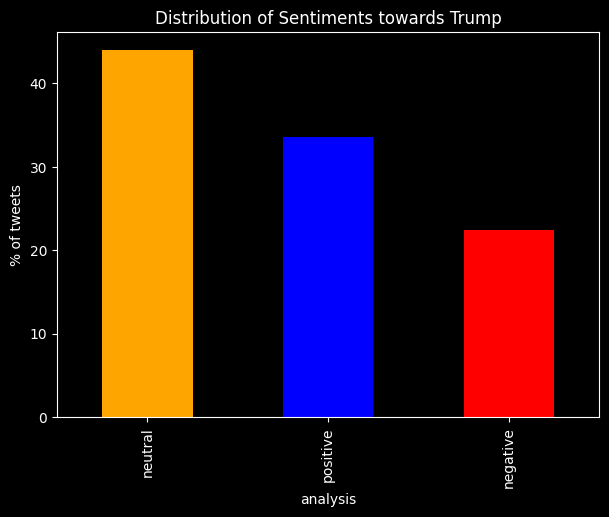

In [36]:
# plotting/distribution of positive, negative and neutral sentiments
plt.style.use('dark_background') # Adding black theme

# Define colors for each bar
colors = ['orange','blue','red']

plt.figure(figsize=(7,5))
(trump_tweets.analysis.value_counts(normalize=True) * 100).plot.bar(color=colors)
plt.ylabel("% of tweets")
plt.title("Distribution of Sentiments towards Trump") 
plt.show()


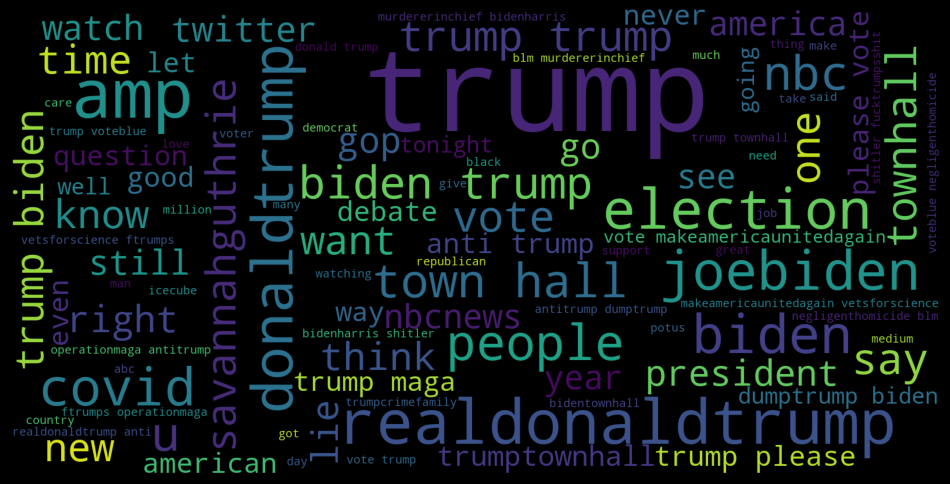

In [38]:
def word_cloud(wd_list):
    stopwords = set(STOPWORDS)
    all_words = ' '.join(wd_list)
    wordcloud = WordCloud(background_color='black',
                           stopwords=stopwords,
                           width=1600, height=800, max_words=100,
                           max_font_size=200,
                           colormap="viridis").generate(all_words)
    plt.figure(figsize=(12,10))
    plt.axis('off')
    plt.imshow(wordcloud)
    
word_cloud(trump_tweets['cleantext'][:5000])

In [39]:
#Biden’s Twitter sentiment analysis

biden_tweets = data[data['candidate'] == 'biden']
biden_tweets = biden_tweets.loc[biden_tweets.country == "US"]
biden_tweets = biden_tweets[['tweet']]
biden_tweets

,tweet
6,"In 2020, #NYPost is being #censorship #CENSORE..."
17,"Comments on this? ""Do Democrats Understand how..."
25,@RealJamesWoods #BidenCrimeFamily #JoeBiden #H...
29,Come on @ABC PLEASE DO THE RIGHT THING. Move t...
34,#realDonaldTrump addresses #JoeBiden and #Hunt...
...,...
776836,"#Biden 🗽🇺🇸👍🏽 | Images 📷 @ Santa Maria, CA. | ..."
776845,Will #criticalRaceTheory become ubiquitous in ...
776847,You moving near #Biden 🤔 https://t.co/1F6i1YIJ2P
776861,#election #2020Elections #trump #biden https:/...


In [40]:
biden_tweets['cleantext'] = biden_tweets['tweet'].apply(clean)
biden_tweets.head()

,tweet,cleantext
6,"In 2020, #NYPost is being #censorship #CENSORE...",nypost censorship censored twitter manipulate ...
17,"Comments on this? ""Do Democrats Understand how...",comment democrat understand ruthless china chi...
25,@RealJamesWoods #BidenCrimeFamily #JoeBiden #H...,realjameswoods bidencrimefamily joebiden hunte...
29,Come on @ABC PLEASE DO THE RIGHT THING. Move t...,come abc please right thing move biden town ha...
34,#realDonaldTrump addresses #JoeBiden and #Hunt...,realdonaldtrump address joebiden hunterbiden c...


In [41]:
#repeating the steps for Joe Biden analysis

biden_tweets['subjectivity'] = biden_tweets['cleantext'].apply(getsubjectivity)
biden_tweets['polarity'] = biden_tweets['cleantext'].apply(getpolarity)
biden_tweets['analysis'] = biden_tweets['polarity'].apply(getAnalysis)
biden_tweets.head()


,tweet,cleantext,subjectivity,polarity,analysis
6,"In 2020, #NYPost is being #censorship #CENSORE...",nypost censorship censored twitter manipulate ...,0.678571,-0.148810,negative
17,"Comments on this? ""Do Democrats Understand how...",comment democrat understand ruthless china chi...,1.000000,-1.000000,negative
25,@RealJamesWoods #BidenCrimeFamily #JoeBiden #H...,realjameswoods bidencrimefamily joebiden hunte...,0.000000,0.000000,neutral
29,Come on @ABC PLEASE DO THE RIGHT THING. Move t...,come abc please right thing move biden town ha...,0.178571,0.078571,positive
34,#realDonaldTrump addresses #JoeBiden and #Hunt...,realdonaldtrump address joebiden hunterbiden c...,0.000000,0.000000,neutral


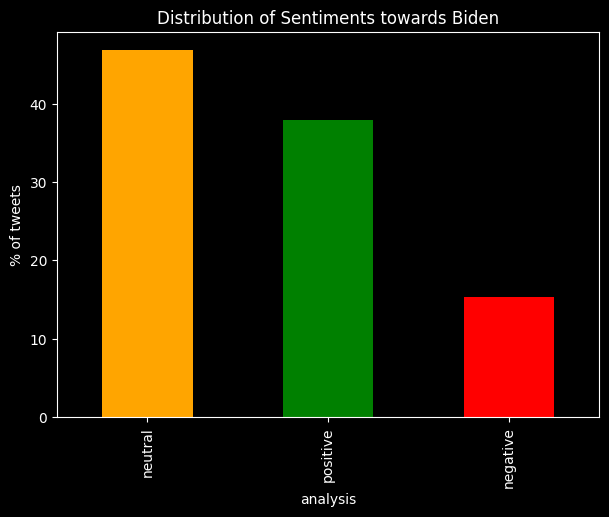

In [42]:
#plotting/distribution of sentiments
plt.style.use('dark_background')

# Define colors for each bar
colors = ['orange', 'green', 'red']

plt.figure(figsize=(7,5))
(biden_tweets.analysis.value_counts(normalize=True)* 100).plot.bar(color=colors)
plt.ylabel("% of tweets")
plt.title("Distribution of Sentiments towards Biden")
plt.show()

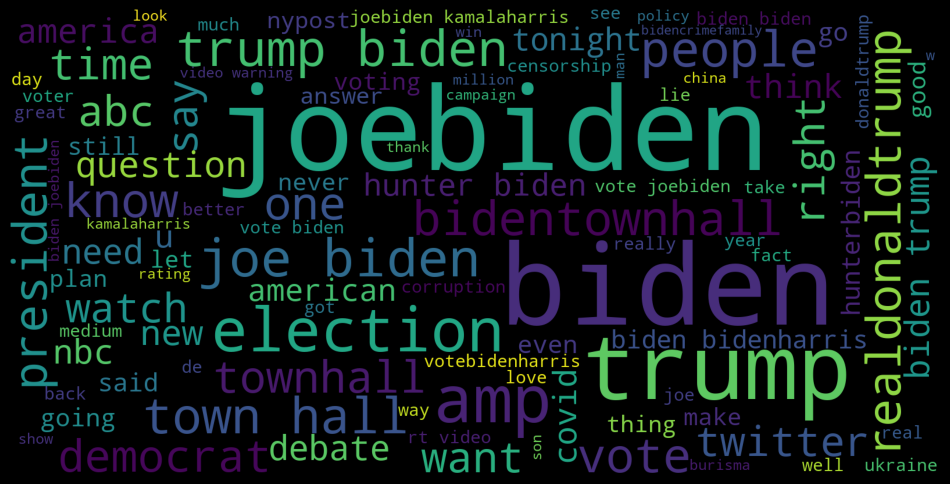

In [43]:
word_cloud(biden_tweets['cleantext'][:5000])

In [44]:
trump_tweets.analysis.value_counts(normalize=True)*100


analysis
neutral     43.995156
positive    33.566890
negative    22.437954
Name: proportion, dtype: float64